In [11]:
import os
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

%matplotlib inline

In [45]:
train_df = pd.read_csv(os.path.join('..', 'input', 'train.csv'))

In [46]:
train_df['ImageId'], train_df['ClassId'] = zip(*train_df['ImageId_ClassId'].apply(lambda x: x.split('_')))

In [47]:
train_df['class_label'] = train_df[['EncodedPixels', 'ClassId']].apply(lambda x: x['ClassId'] if str(x['EncodedPixels']) != 'nan' else 0, axis=1)

In [48]:
train_df.head()

,ImageId_ClassId,EncodedPixels,ImageId,ClassId,class_label
0,0002cc93b.jpg_1,29102 12 29346 24 29602 24 29858 24 30114 24 3...,0002cc93b.jpg,1,1
1,0002cc93b.jpg_2,NaN,0002cc93b.jpg,2,0
2,0002cc93b.jpg_3,NaN,0002cc93b.jpg,3,0
3,0002cc93b.jpg_4,NaN,0002cc93b.jpg,4,0
4,00031f466.jpg_1,NaN,00031f466.jpg,1,0


## クラスラベル毎の画像数

### 0: クラスなし

In [49]:
train_df['class_label'].value_counts()

0    43177
3     5150
1      897
4      801
2      247
Name: class_label, dtype: int64

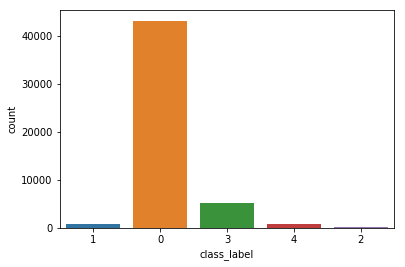

In [50]:
sns.countplot(x='class_label', data=train_df)

In [52]:
train_df = pd.read_csv(os.path.join('..', 'input', 'preprocessed_train.csv'))

In [53]:
train_df.head()

,ImageId,1,2,3,4,class_count,split_label
0,0002cc93b.jpg,29102 12 29346 24 29602 24 29858 24 30114 24 3...,NaN,NaN,NaN,1,1
1,00031f466.jpg,NaN,NaN,NaN,NaN,0,0
2,000418bfc.jpg,NaN,NaN,NaN,NaN,0,0
3,000789191.jpg,NaN,NaN,NaN,NaN,0,0
4,0007a71bf.jpg,NaN,NaN,18661 28 18863 82 19091 110 19347 110 19603 11...,NaN,1,3


## 各画像が持つクラスの数

In [54]:
train_df['class_count'].value_counts()

1    6239
0    5902
2     425
3       2
Name: class_count, dtype: int64

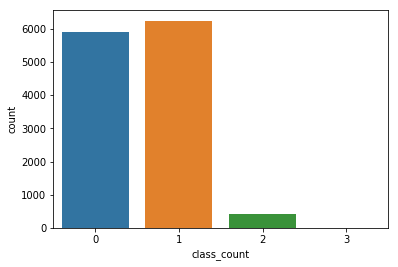

In [55]:
sns.countplot(x='class_count', data=train_df)

In [65]:
two_df = train_df[train_df['class_count'] == 2]

In [81]:
def two_classes(x):
    first = None
    second = None
    
    if str(x['1']) == 'nan':
        if first is None:
            first = 1
        else:
            second = 1
    if str(x['2']) == 'nan':
        if first is None:
            first = 2
        else:
            second = 2
    if str(x['3']) == 'nan':
        if first is None:
            first = 3
        else:
            second = 3
    if str(x['4']) == 'nan':
        if first is None:
            first = 4
        else:
            second = 4
    
    if first > second:
        first, second = second, first
            
    return (first, second)

In [82]:
two_df['first_label'], two_df['second_label'] = zip(*two_df[['1', '2', '3', '4']].apply(lambda x: two_classes(x), axis=1))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [83]:
two_df['flag'] = 1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [84]:
two_df.head()

,ImageId,1,2,3,4,class_count,split_label,first_label,second_label,flag
11,0025bde0c.jpg,NaN,NaN,8458 14 8707 35 8963 48 9219 71 9475 88 9731 8...,315139 8 315395 15 315651 16 315906 17 316162 ...,2,0,1,2,1
14,002fc4e19.jpg,146021 3 146275 10 146529 40 146783 46 147038 ...,145658 7 145901 20 146144 33 146386 47 146629 ...,NaN,NaN,2,0,3,4,1
34,008ef3d74.jpg,356336 4 356587 11 356838 18 357089 25 357340 ...,375439 5 375687 14 375935 24 376182 34 376430 ...,NaN,NaN,2,0,3,4,1
37,00ac8372f.jpg,101742 3 101998 12 102253 19 102301 22 102509 ...,98114 24 98370 72 98626 119 98881 168 99137 19...,NaN,NaN,2,0,3,4,1
44,00c88fed0.jpg,10474 7 10728 15 10983 18 11239 21 11494 24 11...,13428 8 13684 24 13940 39 14196 55 14452 71 14...,NaN,NaN,2,0,3,4,1


In [85]:
group = two_df.groupby(['first_label', 'second_label'])['flag'].count().reset_index().rename(columns={'flag': 'count'})

In [91]:
group['label'] = group[['first_label', 'second_label']].apply(lambda x: str(x['first_label']) + '_' + str(x['second_label']), axis=1)

## ２クラスを持つ画像のラベルペア毎の数

In [92]:
group.head()

,first_label,second_label,count,label
0,1,2,284,1_2
1,1,3,1,1_3
2,1,4,14,1_4
3,2,4,91,2_4
4,3,4,35,3_4


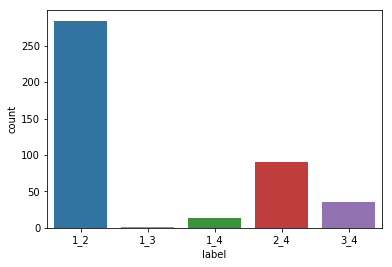

In [95]:
sns.barplot(x='label', y='count', data=group)